In [1]:
import pickle
from utils import *

N = 400
c = np.array([0.1, 0.05, 0.2])
alpha = 0.4
theta_init = 0.25
lambdas = [0,0.75,1,5,10]
eta = 0.5
role_model = 0.5

mean = np.array([4.9,5]) # Groups U, V
std = np.array([np.sqrt(1.1),1]) # Groups U, V
method = 'approx'
num_instances = 200
num_rounds = 40

decay = 0
seed_val = 23

In [2]:
# Choice of expts to run:
pure_pos_reinf = True
role_model_reinf = True
weight_reinf = True
order_reinf = True

results = {}

In [3]:
lambda_ = 1

In [4]:
if pure_pos_reinf:
    np.random.seed(seed_val)
    applicants_u_MFG, admitted_u_MFG, theta_vec_MFG, role_model_MFG = process_MFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds, decay=decay, epsilon=0.01, reinf_method='positive')
    np.random.seed(seed_val)
    applicants_u_CMFG, admitted_u_CMFG, theta_vec_CMFG, role_model_CMFG = process_CMFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds, decay=decay, epsilon=0.01, reinf_method='positive')
    results['pure_pos_reinf'] = {'applicants_u_MFG': applicants_u_MFG, 'admitted_u_MFG': admitted_u_MFG, 'theta_vec_MFG': theta_vec_MFG, 'role_model_MFG': role_model_MFG, 'applicants_u_CMFG': applicants_u_CMFG, 'admitted_u_CMFG': admitted_u_CMFG, 'theta_vec_CMFG': theta_vec_CMFG, 'role_model_CMFG': role_model_CMFG}

if role_model_reinf:
    np.random.seed(seed_val)
    applicants_u_MFG, admitted_u_MFG, theta_vec_MFG, role_model_MFG = process_MFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds, decay=decay, epsilon=0.01, role_model_ratio=role_model, reinf_method='role_model')
    np.random.seed(seed_val)
    applicants_u_CMFG, admitted_u_CMFG, theta_vec_CMFG, role_model_CMFG = process_CMFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds+40, decay=decay, epsilon=0.01, role_model_ratio=role_model, reinf_method='role_model')
    results['role_model_reinf'] = {'applicants_u_MFG': applicants_u_MFG, 'admitted_u_MFG': admitted_u_MFG, 'theta_vec_MFG': theta_vec_MFG, 'role_model_MFG': role_model_MFG, 'applicants_u_CMFG': applicants_u_CMFG, 'admitted_u_CMFG': admitted_u_CMFG, 'theta_vec_CMFG': theta_vec_CMFG, 'role_model_CMFG': role_model_CMFG}


100%|██████████| 200/200 [00:09<00:00, 21.87it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [04:04<00:00,  1.22s/it]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:04<00:00, 40.69it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [02:25<00:00,  1.37it/s]

CMFG Setting, all instances are finished.


In [5]:
theta_vec_MFG_lambdas = []

for lambda_ in lambdas:
    np.random.seed(seed_val)
    applicants_u_MFG, admitted_u_MFG, theta_vec_MFG, role_model_MFG = process_MFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds, decay=decay, epsilon=0.01, reinf_method='positive')
    theta_vec_MFG_lambdas.append(theta_vec_MFG)

results['lambdas'] = {'lambdas': lambdas, 'theta_vec_MFG_lambdas': theta_vec_MFG_lambdas}

100%|██████████| 200/200 [00:07<00:00, 27.04it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [00:08<00:00, 23.30it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [00:08<00:00, 22.95it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [00:08<00:00, 23.33it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [00:08<00:00, 22.60it/s]

MFG Setting, all instances are finished.


In [6]:
with open('results/results_dist_gausssian.pkl', 'wb') as f:
    pickle.dump(results, f)

In [7]:
with open('results/results_dist_gausssian.pkl', 'rb') as f:
    results = pickle.load(f)


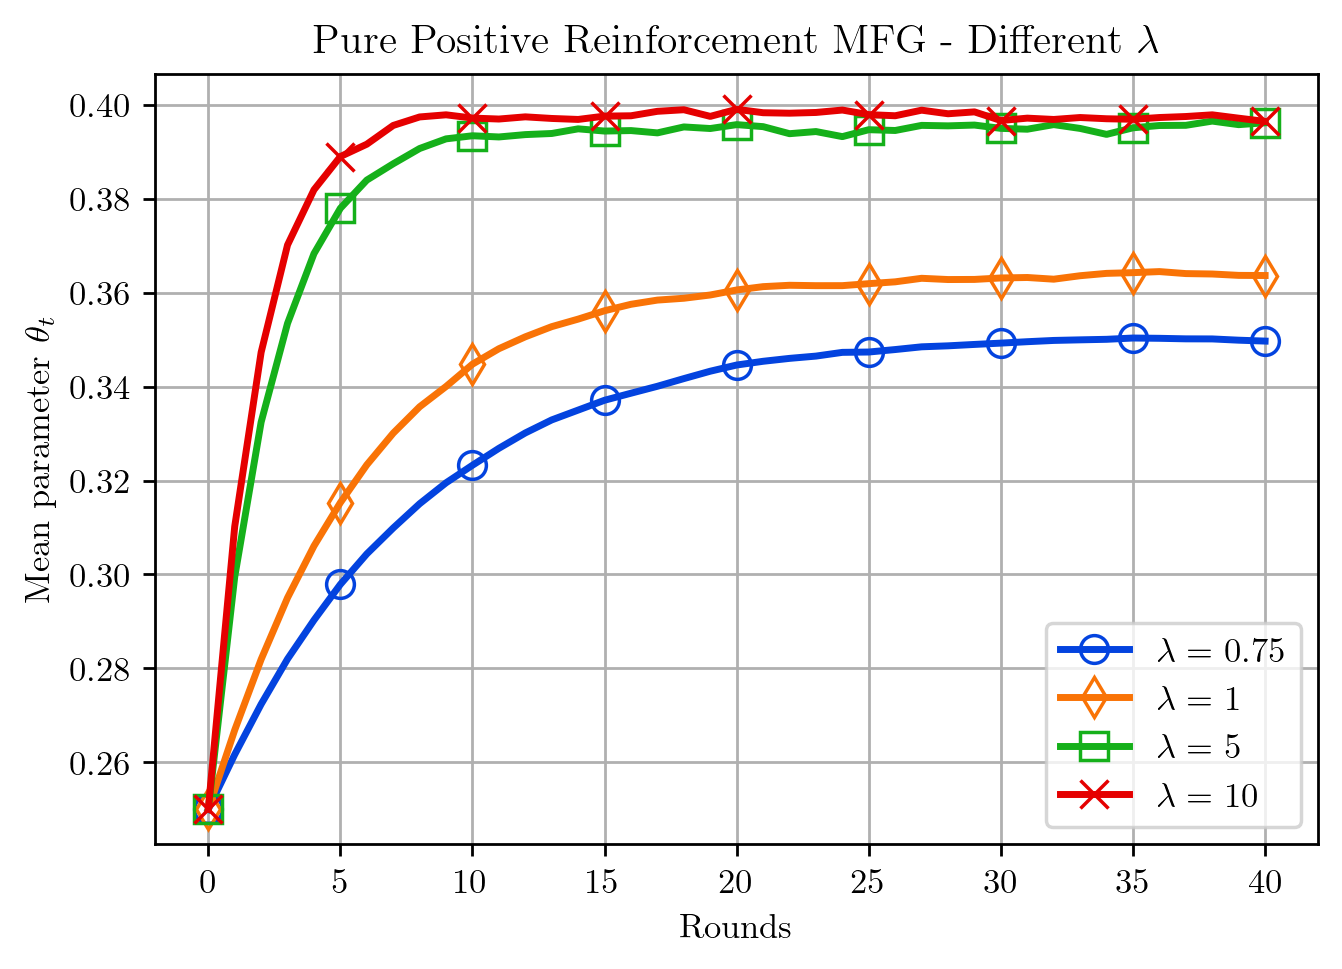

In [8]:
fig_lambdas_pure_MFG_distinct = plot_results_diff_lambdas(results['lambdas']['theta_vec_MFG_lambdas'], results['lambdas']['lambdas'], 'Pure Positive Reinforcement MFG - Different $\lambda$')
fig_lambdas_pure_MFG_distinct.savefig('figures/pure_pos_reinf_diff_lambda_MFG_distinct.pdf', bbox_inches='tight')

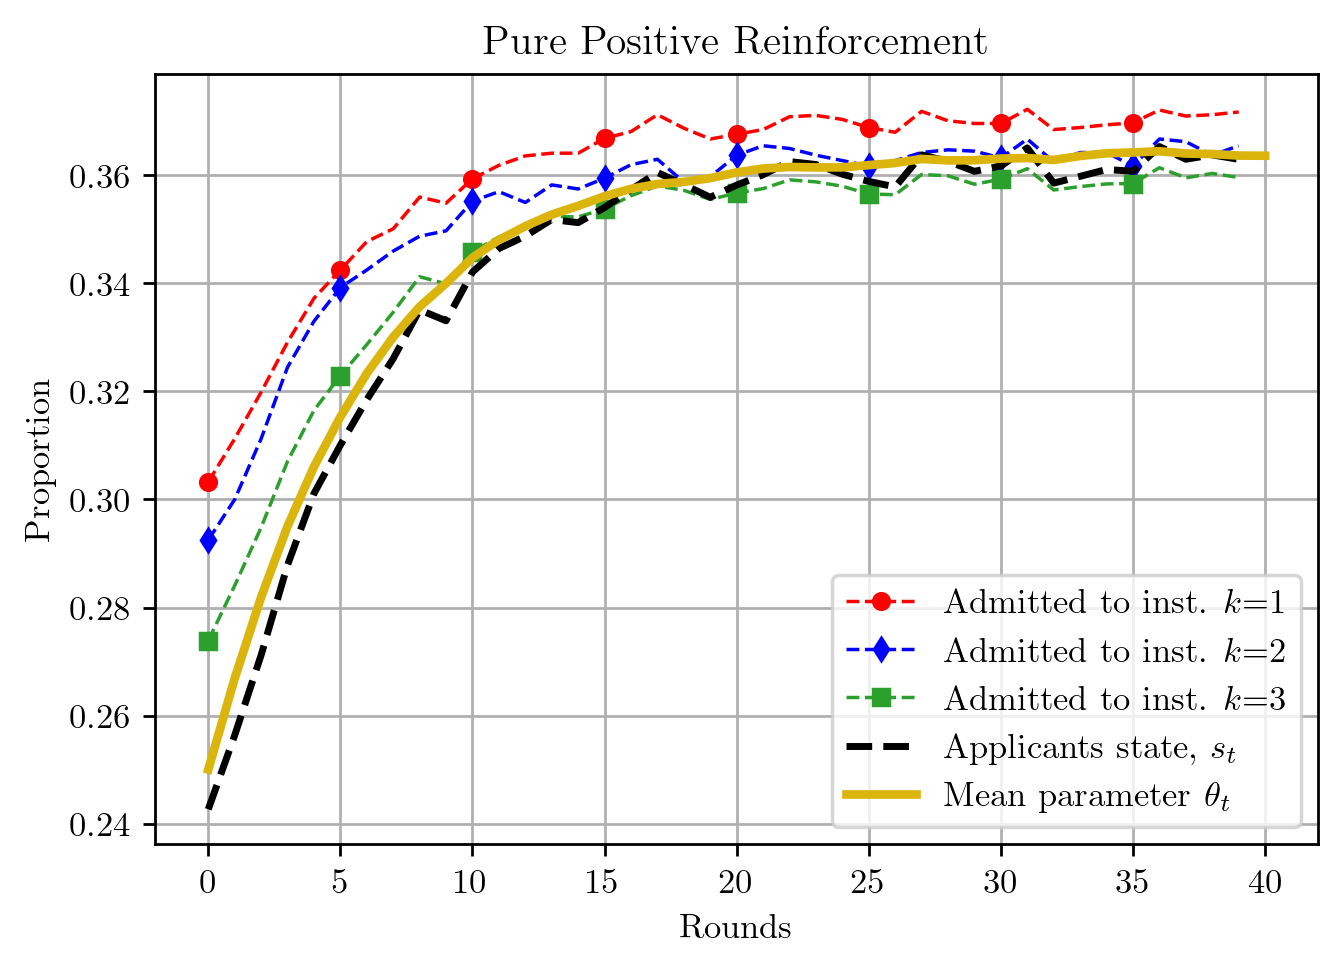

In [9]:
fig_pure_MFG_distinct = plot_results_pos(results['pure_pos_reinf']['applicants_u_MFG'],results['pure_pos_reinf']['admitted_u_MFG'],results['pure_pos_reinf']['theta_vec_MFG'],'Pure Positive Reinforcement',mark=5)
fig_pure_MFG_distinct.savefig('figures/pure_pos_reinf_MFG_distinct.pdf',bbox_inches='tight')

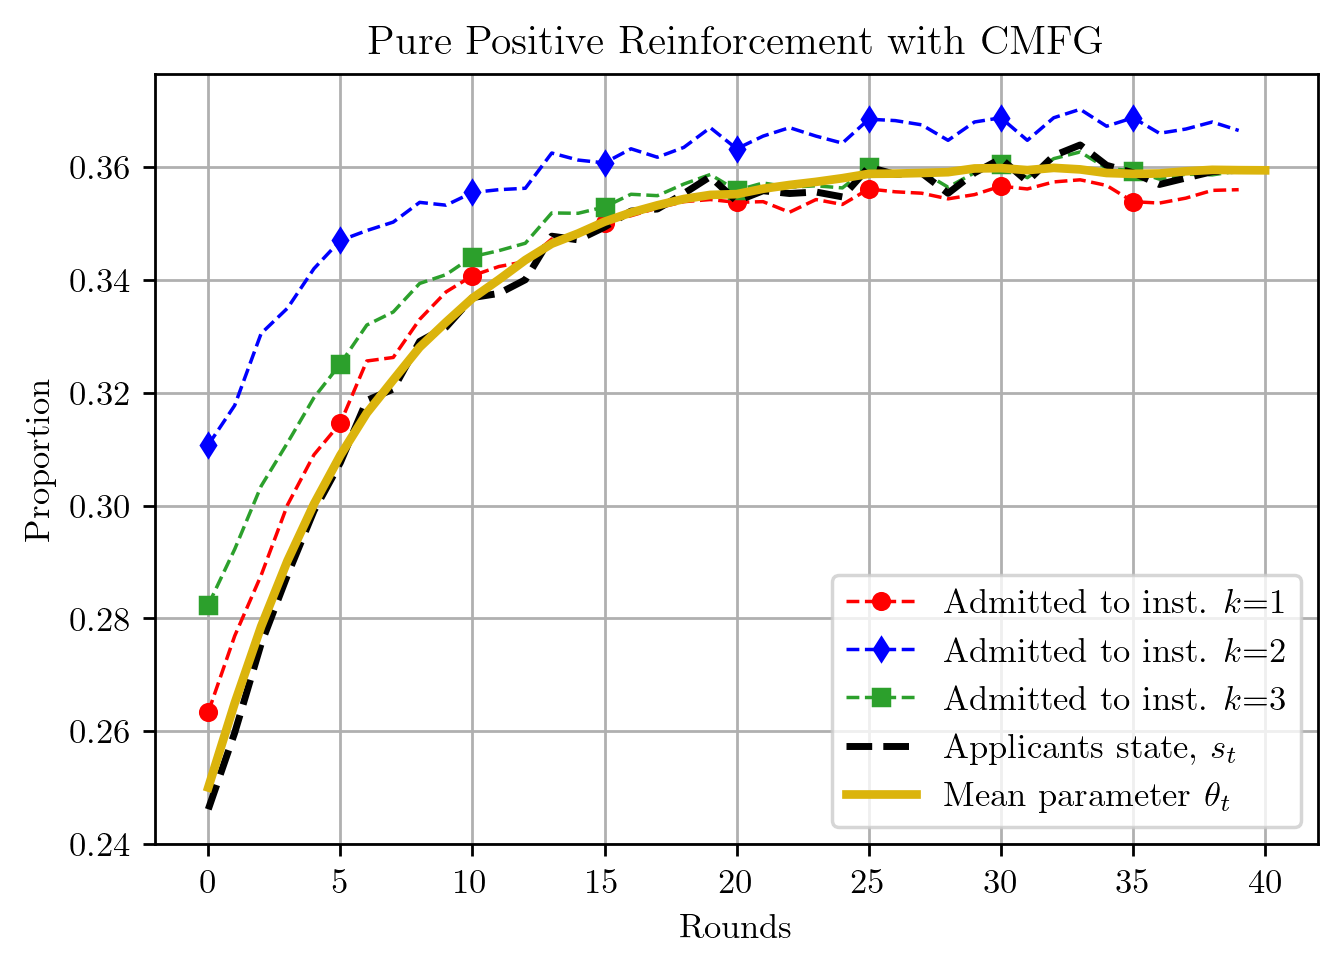

In [10]:
fig_pure_CMFG_distinct = plot_results_pos(results['pure_pos_reinf']['applicants_u_CMFG'],results['pure_pos_reinf']['admitted_u_CMFG'],results['pure_pos_reinf']['theta_vec_CMFG'],'Pure Positive Reinforcement with CMFG',mark=5)
fig_pure_CMFG_distinct.savefig('figures/pure_pos_reinf_CMFG_distinct.pdf',bbox_inches='tight')

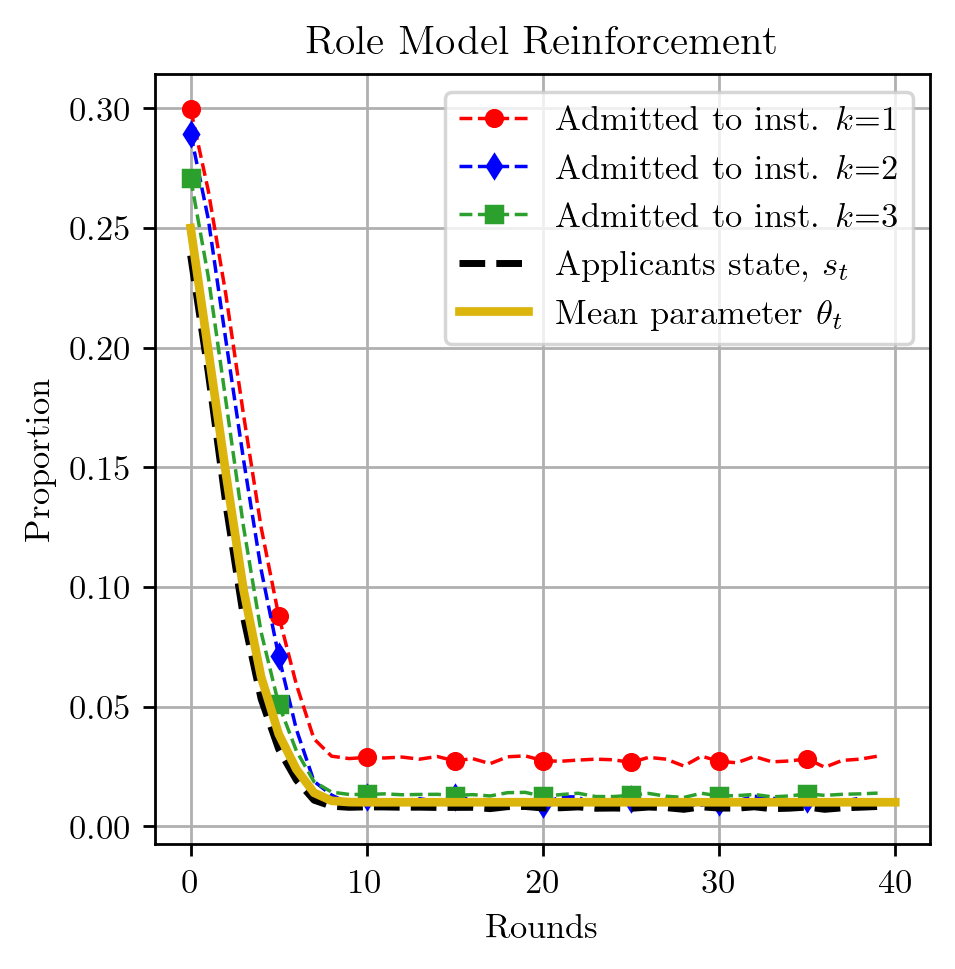

In [11]:
fig_role_model_MFG_distinct = plot_results_role_model(results['role_model_reinf']['applicants_u_MFG'],results['role_model_reinf']['admitted_u_MFG'],results['role_model_reinf']['role_model_MFG'],results['role_model_reinf']['theta_vec_MFG'],'Role Model Reinforcement')
fig_role_model_MFG_distinct.savefig('figures/role_model_reinf_MFG_distinct.pdf',bbox_inches='tight')

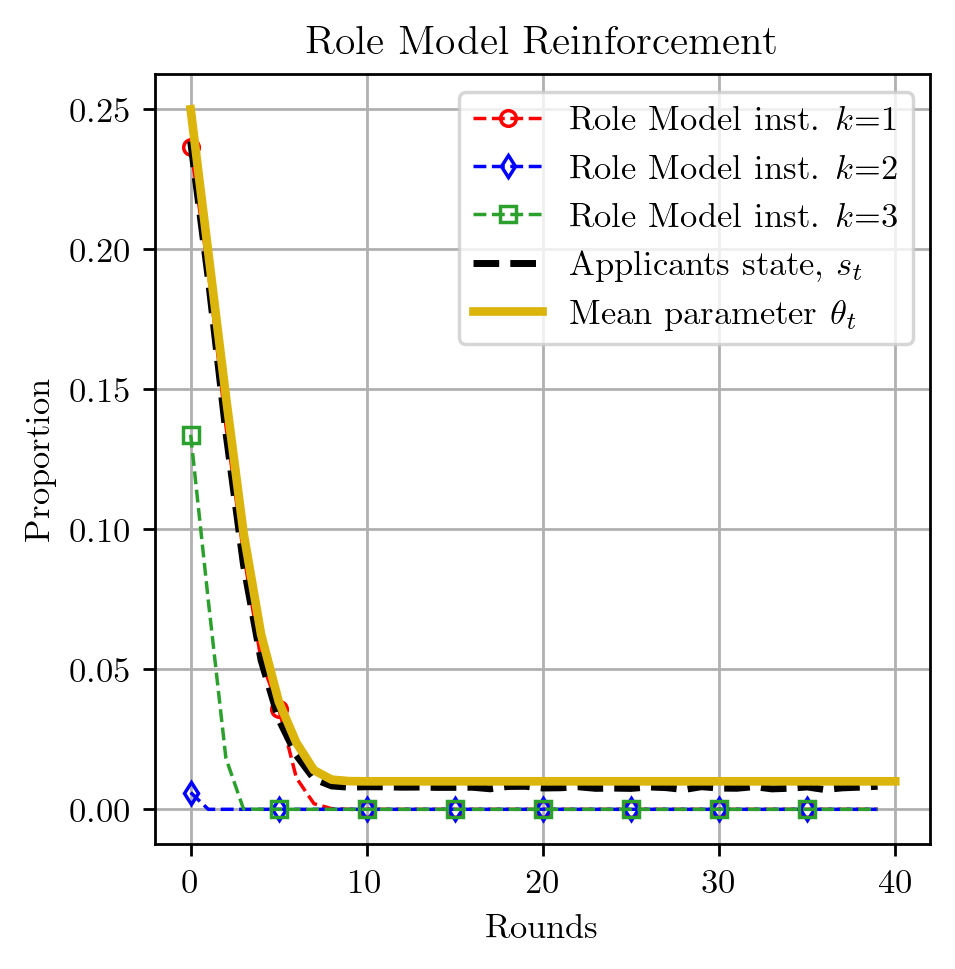

In [12]:
fig_role_model_MFG_distinct = plot_results_role_model(results['role_model_reinf']['applicants_u_MFG'],results['role_model_reinf']['admitted_u_MFG'],results['role_model_reinf']['role_model_MFG'],results['role_model_reinf']['theta_vec_MFG'],'Role Model Reinforcement', True)
fig_role_model_MFG_distinct.savefig('figures/role_model_reinf_MFG_role_model_distinct.pdf',bbox_inches='tight')

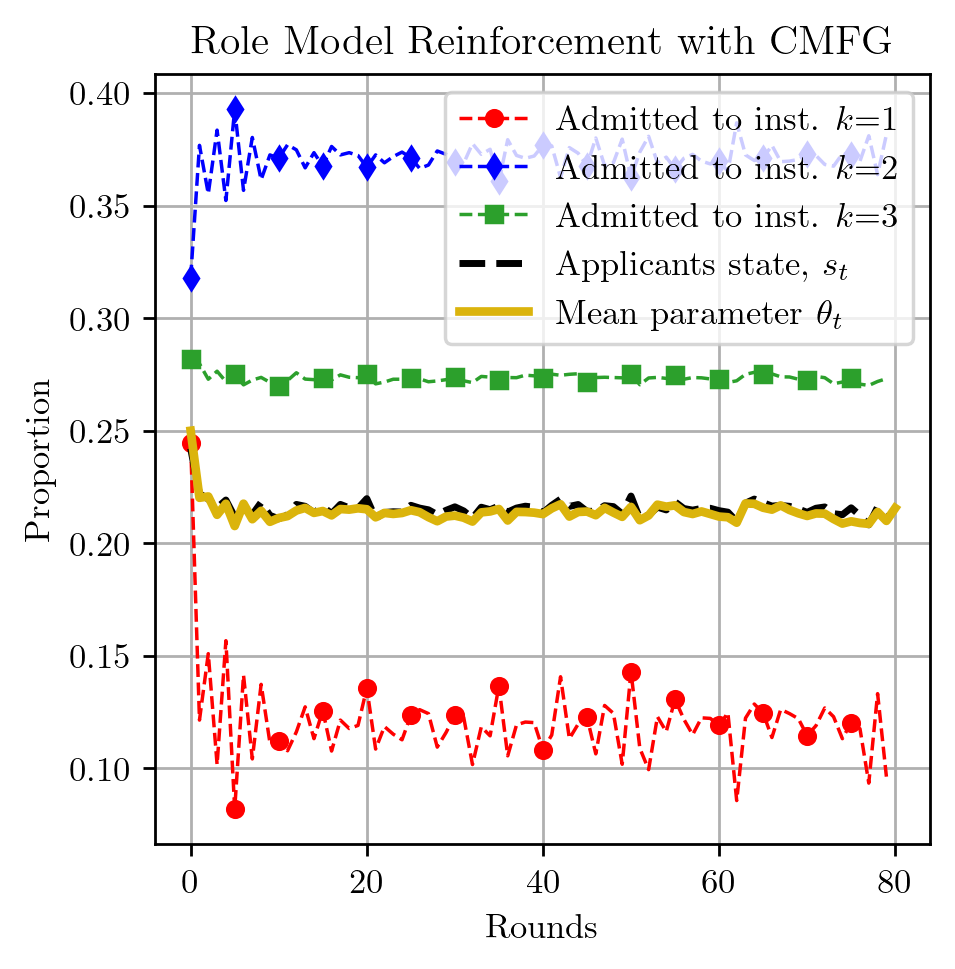

In [13]:
fig_role_model_CMFG_distinct = plot_results_role_model(results['role_model_reinf']['applicants_u_CMFG'],results['role_model_reinf']['admitted_u_CMFG'],results['role_model_reinf']['role_model_CMFG'],results['role_model_reinf']['theta_vec_CMFG'],'Role Model Reinforcement with CMFG')
fig_role_model_CMFG_distinct.savefig('figures/role_model_reinf_CMFG_distinct.pdf',bbox_inches='tight')

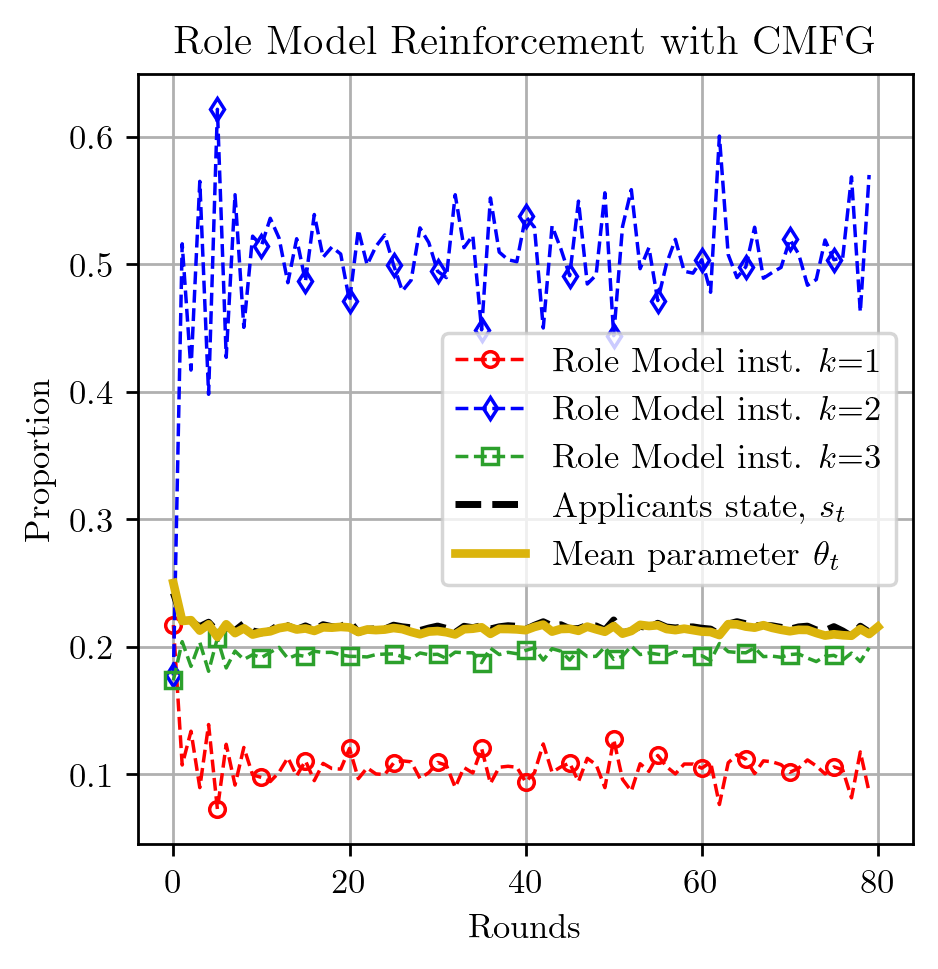

In [14]:
fig_role_model_CMFG_distinct = plot_results_role_model(results['role_model_reinf']['applicants_u_CMFG'],results['role_model_reinf']['admitted_u_CMFG'],results['role_model_reinf']['role_model_CMFG'],results['role_model_reinf']['theta_vec_CMFG'],'Role Model Reinforcement with CMFG', True)
fig_role_model_CMFG_distinct.savefig('figures/role_model_reinf_CMFG_role_model_distinct.pdf',bbox_inches='tight')